Importing the libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
full_data = pd.read_csv('/kaggle/input/dataman/Dataset.csv')
full_data.head()

,CUST_ID,VAR001,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,SELF_PAY
0,CNO000001,31/03/2019,21/09/2018,MOBILE,CD00124531,CD04818,Y,3,10,1799,16/11/1978,3054,17990,17990,5527,12TH,SELF,OWNED,3,5,8994.73,17990.0,17990.0,191.0,NaN,NaN,NaN,NaN,191.0,0
1,CNO000002,30/04/2019,21/09/2018,MOBILE,CD00124531,CD04818,Y,3,10,1799,16/11/1978,3054,17990,17990,5527,12TH,SELF,OWNED,4,6,7195.82,17990.0,17990.0,221.0,NaN,NaN,NaN,NaN,221.0,0
2,CNO000003,31/05/2019,21/09/2018,MOBILE,CD00124531,CD04818,Y,3,10,1799,16/11/1978,3054,17990,17990,5527,12TH,SELF,OWNED,5,7,5396.89,17990.0,17990.0,252.0,NaN,NaN,NaN,NaN,252.0,0
3,CNO000004,31/01/2019,21/06/2018,MOBILE,CD0005249,CD02428,Y,2,12,2834,10/03/1990,3078,35900,34000,5798,POST-GRADUATE,SAL,OWNED,1,7,14168.46,34000.0,34000.0,224.0,NaN,NaN,NaN,NaN,224.0,0
4,CNO000005,30/04/2019,21/06/2018,MOBILE,CD0005249,CD02428,Y,2,12,2834,10/03/1990,3078,35900,34000,5798,POST-GRADUATE,SAL,OWNED,2,10,5667.69,34000.0,34000.0,313.0,NaN,NaN,NaN,NaN,313.0,0


Splitting Dataset into Training and Test set:

In [2]:
y = full_data['SELF_PAY']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_data, y, test_size = 0.2, random_state = 42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

Check for Missing Value Columns :

In [3]:
na_columns = X_train.isna().sum()
print(na_columns[na_columns!=0])

VAR017      3161
VAR021     33760
VAR022     33785
VAR023     33744
VAR024    394726
VAR025    402159
VAR026    421264
VAR027    414665
VAR028     33787
dtype: int64


**Missing values and Imputation**

Missing values and Imputation: (part 1)

In [4]:
X_train = X_train.drop(['VAR024','VAR025','VAR026','VAR027'],axis=1)

Missing values and Imputation: (part 2)

In [5]:
#VAR17
X_train['VAR017'] = X_train['VAR017'].replace({ np.nan:"OWNED"})

X_train['VAR021'] = X_train.apply(
    lambda row: row['VAR013'] if np.isnan(row['VAR021']) else row['VAR021'],
    axis=1
)
#VAR22
X_train['VAR022'] = X_train.apply(
    lambda row: row['VAR013'] if np.isnan(row['VAR022']) else row['VAR022'],
    axis=1
)


Missing values and Imputation: (part 2)

In [6]:
#VAR23
gdf = X_train.groupby(['VAR003'])[['VAR023']].mean()
for i in range(0,len(gdf)):
    vMonth = gdf.index[i]
    vMeans = gdf['VAR023'][vMonth]
    X_train['VAR023'] = np.where(  ( (X_train['VAR023'].isnull()) & (X_train['VAR003']==vMonth) ), vMeans, X_train['VAR023'] )
#VAR28
gdf = X_train.groupby(['VAR015'])[['VAR028']].mean()
for i in range(0,len(gdf)):
    vMonth = gdf.index[i]
    vMeans = gdf['VAR028'][vMonth]
    X_train['VAR028'] = np.where(  ( (X_train['VAR028'].isnull()) & (X_train['VAR015']==vMonth) ), vMeans, X_train['VAR028'] )    


Feature Engineering

In [7]:
dob = X_train['VAR010']
from datetime import datetime
date_format = "%d/%m/%Y"
#a = datetime.strptime('13/9/1995', date_format)
b = datetime.strptime('31/5/2019', date_format)
X_train['VAR010'] = dob.apply(lambda x:(b-datetime.strptime(x, date_format)).days/365).astype(int)
#X_train.head()
dob2 = X_train['VAR002']
from datetime import datetime
date_format = "%d/%m/%Y"
b = datetime.strptime('31/5/2019', date_format)
#VAR02
X_train['VAR002'] = dob2.apply(lambda x:(b-datetime.strptime(x, date_format)).days).astype(int)

Check for Missing Values, So, No more missing values

In [8]:
na_columns = X_train.isna().sum()
print(na_columns[na_columns!=0])

Series([], dtype: int64)


**EDA (Exploratory Data Analysis)**

In [9]:
sns.set_style("darkgrid")

VAR001 : Last Date of Month

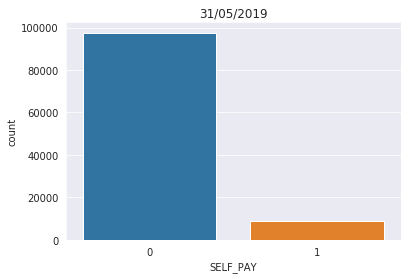

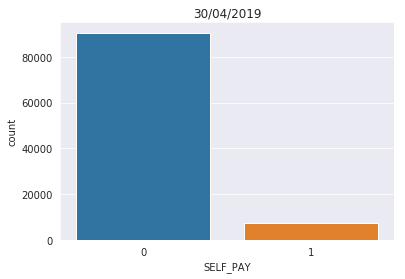

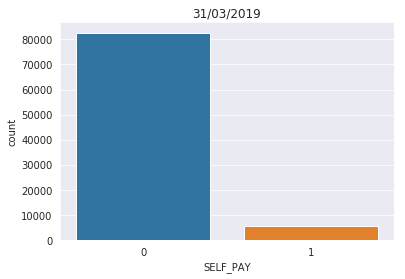

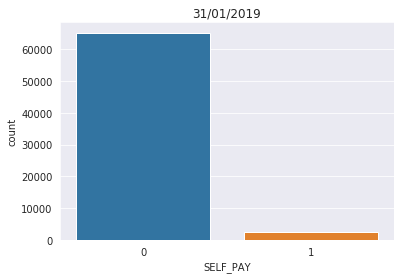

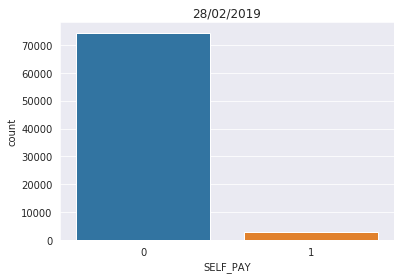

In [10]:
date_types = list(X_train['VAR001'].unique())
for i,i_date in enumerate(date_types):
    date_type = eval('X_train.loc[X_train["VAR001"]=="'+i_date+'"]')
    plt.figure(i)
    sns.countplot(date_type['SELF_PAY']).set_title(i_date)

VAR003 : Product Type

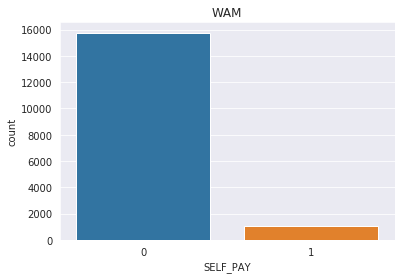

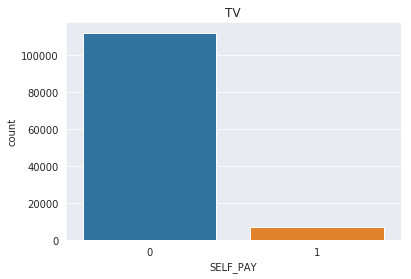

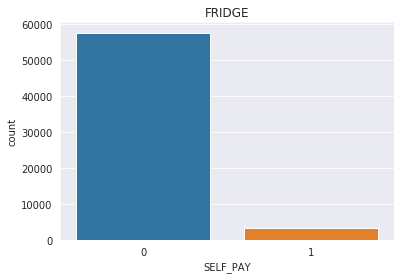

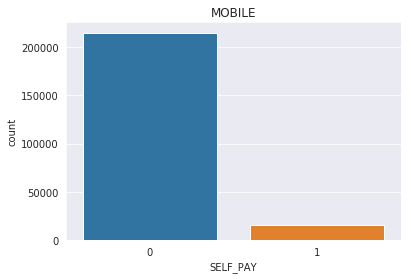

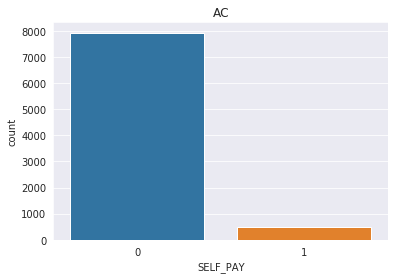

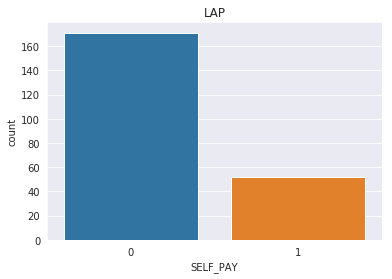

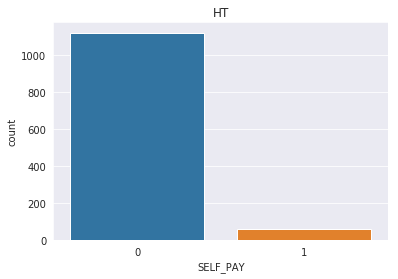

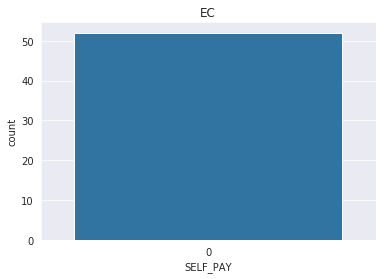

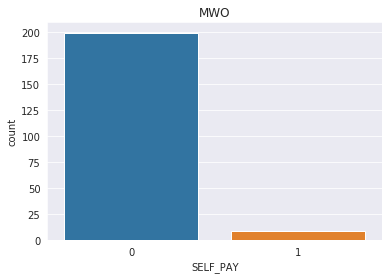

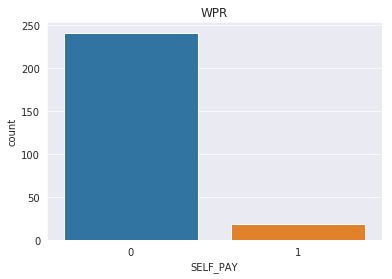

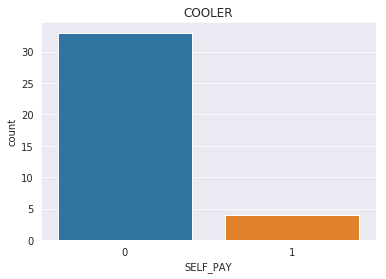

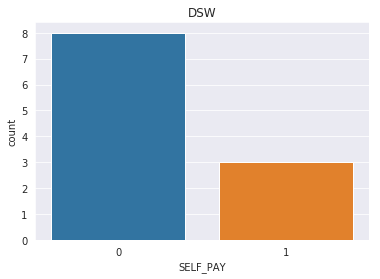

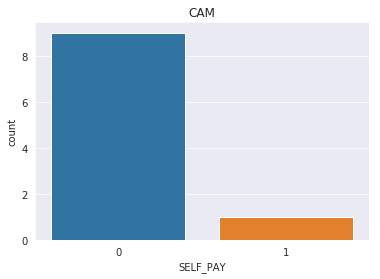

In [11]:
prod_types = list(X_train['VAR003'].unique())
for i,i_prod in enumerate(prod_types):
    prod_type = eval('X_train.loc[X_train["VAR003"]=="'+i_prod+'"]')
    plt.figure(i)
    sns.countplot(prod_type['SELF_PAY']).set_title(i_prod)

VAR006 : App Installed or not

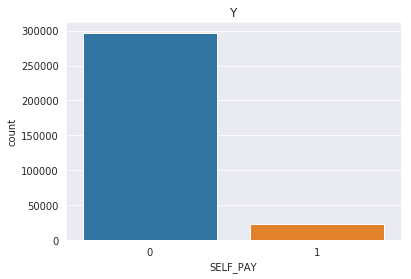

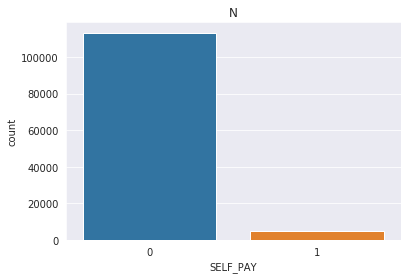

In [12]:
app_types = list(X_train['VAR006'].unique())
for i,i_app in enumerate(app_types):
    app_type = eval('X_train.loc[X_train["VAR006"]=="'+i_app+'"]')
    plt.figure(i)
    sns.countplot(app_type['SELF_PAY']).set_title(i_app)

VAR015 : Qualification

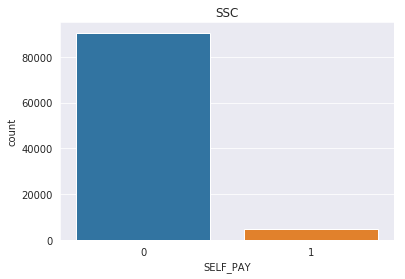

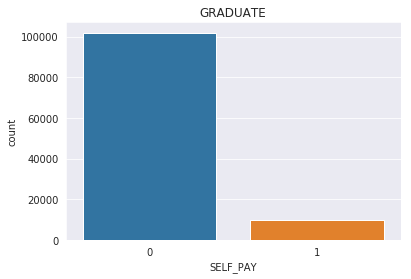

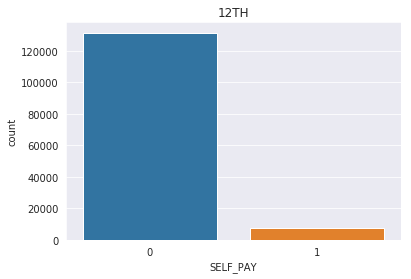

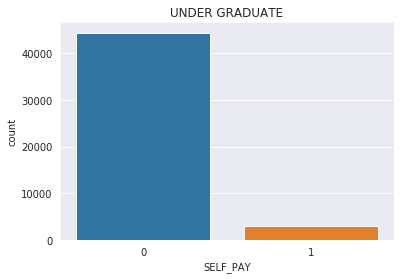

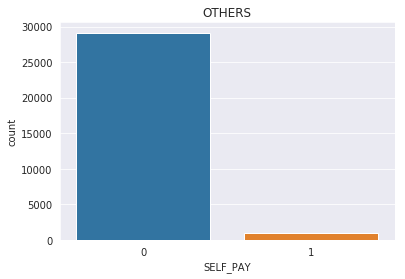

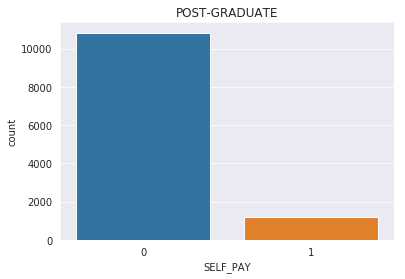

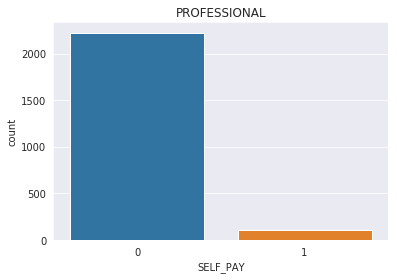

In [13]:
qual_types = list(X_train['VAR015'].unique())
for i,i_qual in enumerate(qual_types):
    qual_type = eval('X_train.loc[X_train["VAR015"]=="'+i_qual+'"]')
    plt.figure(i)
    sns.countplot(qual_type['SELF_PAY']).set_title(i_qual)

VAR016 : Employment

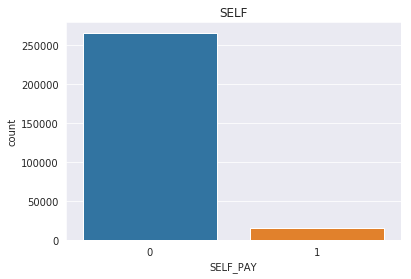

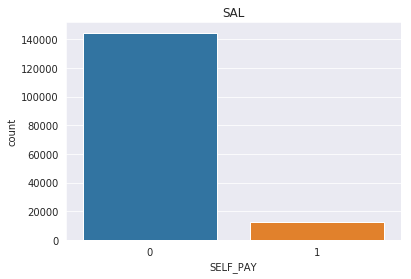

In [14]:
emp_types = list(X_train['VAR016'].unique())
for i,i_emp in enumerate(emp_types):
    emp_type = eval('X_train.loc[X_train["VAR016"]=="'+i_emp+'"]')
    plt.figure(i)
    sns.countplot(emp_type['SELF_PAY']).set_title(i_emp)

VAR017 : Resident Type

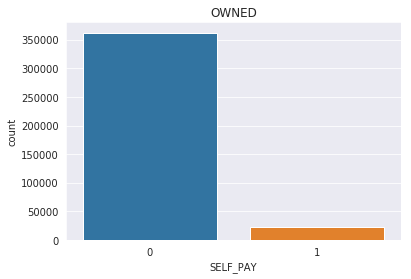

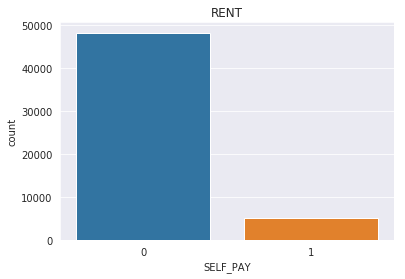

In [15]:
home_types = list(X_train['VAR017'].unique())
for i,i_home in enumerate(home_types):
    home_type = eval('X_train.loc[X_train["VAR017"]=="'+i_home+'"]')
    plt.figure(i)
    sns.countplot(home_type['SELF_PAY']).set_title(i_home)


**Feature Selection**

Categorical Feature Selection:
We select only those categorical features which has not more than 15 unique values.

In [16]:
categoricalCols = ['VAR001','VAR003','VAR006','VAR015','VAR016','VAR017','SELF_PAY']

Feature Selection : Numeric

In [17]:
numericCols = ['VAR002','VAR007','VAR008','VAR009','VAR010','VAR012','VAR013','VAR014','VAR018','VAR019','VAR020','VAR021','VAR022','VAR023','VAR028']
features = numericCols + categoricalCols
X_train = X_train.loc[:,features]
X_train.head()

,VAR002,VAR007,VAR008,VAR009,VAR010,VAR012,VAR013,VAR014,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR028,VAR001,VAR003,VAR006,VAR015,VAR016,VAR017,SELF_PAY
232568,197,4,12,1084,32,12500,13000,4336,6,6,6501.84,13000.0,13000.0,197.000000,197.000000,31/05/2019,WAM,Y,SSC,SELF,OWNED,0
503096,88,0,9,3889,25,48000,35000,500,2,2,27221.95,35000.0,35000.0,142.452717,321.637319,31/05/2019,TV,Y,GRADUATE,SAL,OWNED,1
454045,115,4,12,1222,23,14150,14650,4888,2,2,12210.11,14650.0,14650.0,40.000000,84.000000,30/04/2019,FRIDGE,N,GRADUATE,SAL,OWNED,0
333145,231,2,10,2200,22,22000,22000,4530,5,5,10999.67,90000.0,22000.0,66.000000,170.000000,31/03/2019,MOBILE,Y,GRADUATE,SAL,OWNED,0
462076,108,3,10,1049,36,10490,10490,3777,1,2,8391.64,14000.0,14000.0,67.000000,77.000000,30/04/2019,MOBILE,Y,SSC,SELF,OWNED,0


Correlation Matrix : to eliminate multi-colinearity

Text(0.5, 1.0, 'Heatmap of Correlation')

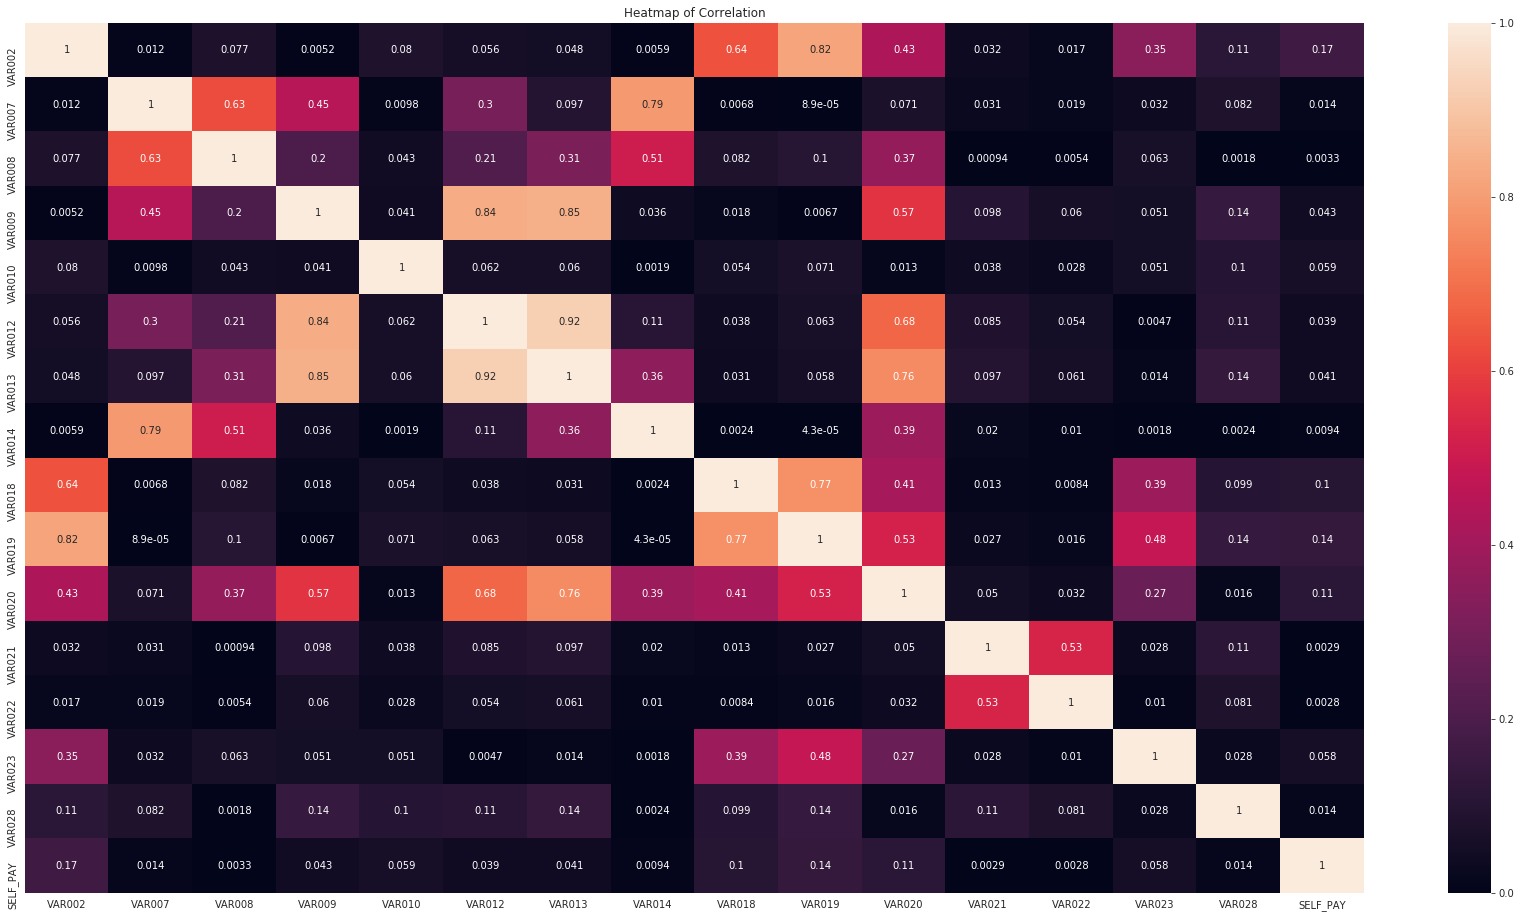

In [18]:
correlationMatrix = X_train.corr().abs()
plt.figure(figsize=(30,16))
heat = sns.heatmap(data=correlationMatrix, annot=True)
plt.title('Heatmap of Correlation')

We eliminate one column out those pairs which show high correlation(greater than 0.7).

In [19]:
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop
for i_var in to_drop:
    numericCols.remove(i_var)
numericCols

['VAR002',
 'VAR007',
 'VAR008',
 'VAR009',
 'VAR010',
 'VAR018',
 'VAR021',
 'VAR022',
 'VAR023',
 'VAR028']

So, Train Set looks like this after Feature Selection

In [20]:
features = numericCols + categoricalCols
X_train = X_train.loc[:,features]
X_train.head()

,VAR002,VAR007,VAR008,VAR009,VAR010,VAR018,VAR021,VAR022,VAR023,VAR028,VAR001,VAR003,VAR006,VAR015,VAR016,VAR017,SELF_PAY
232568,197,4,12,1084,32,6,13000.0,13000.0,197.000000,197.000000,31/05/2019,WAM,Y,SSC,SELF,OWNED,0
503096,88,0,9,3889,25,2,35000.0,35000.0,142.452717,321.637319,31/05/2019,TV,Y,GRADUATE,SAL,OWNED,1
454045,115,4,12,1222,23,2,14650.0,14650.0,40.000000,84.000000,30/04/2019,FRIDGE,N,GRADUATE,SAL,OWNED,0
333145,231,2,10,2200,22,5,90000.0,22000.0,66.000000,170.000000,31/03/2019,MOBILE,Y,GRADUATE,SAL,OWNED,0
462076,108,3,10,1049,36,1,14000.0,14000.0,67.000000,77.000000,30/04/2019,MOBILE,Y,SSC,SELF,OWNED,0


**Feature Scaling & One Hot Encoding!**

Train Set after Feature Scaling & One Hot Encoding

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms1 = MinMaxScaler()
a1 = pd.get_dummies(data = X_train,drop_first=True)
X_train_final = pd.DataFrame(mms1.fit_transform(a1), columns = list(a1))
y_train_final = pd.DataFrame(X_train_final['SELF_PAY'])
X_train_final = X_train_final.drop(['SELF_PAY'],1)
X_train_final.head()

,VAR002,VAR007,VAR008,VAR009,VAR010,VAR018,VAR021,VAR022,VAR023,VAR028,VAR001_30/04/2019,VAR001_31/01/2019,VAR001_31/03/2019,VAR001_31/05/2019,VAR003_CAM,VAR003_COOLER,VAR003_DSW,VAR003_EC,VAR003_FRIDGE,VAR003_HT,VAR003_LAP,VAR003_MOBILE,VAR003_MWO,VAR003_TV,VAR003_WAM,VAR003_WPR,VAR006_Y,VAR015_GRADUATE,VAR015_OTHERS,VAR015_POST-GRADUATE,VAR015_PROFESSIONAL,VAR015_SSC,VAR015_UNDER GRADUATE,VAR016_SELF,VAR017_RENT
0,0.293774,0.500,0.200000,0.038561,0.168675,0.333333,0.000121,0.000110,0.017835,0.017600,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.081712,0.000,0.100000,0.211624,0.084337,0.066667,0.000341,0.000414,0.012896,0.031938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.134241,0.500,0.200000,0.047076,0.060241,0.066667,0.000137,0.000133,0.003621,0.004601,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.359922,0.250,0.133333,0.107416,0.048193,0.266667,0.000891,0.000235,0.005975,0.014494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.120623,0.375,0.133333,0.036402,0.216867,0.000000,0.000131,0.000124,0.006066,0.003796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


in the same way, we preprocess the Test set data

Test Set before preprocessing

In [22]:
X_test.head()

,CUST_ID,VAR001,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,SELF_PAY
88761,CNO088762,31/03/2019,05/07/2018,TV,CD0011090,CD01257,N,4,12,1750,20/04/1996,3007,21000,21000,7000,UNDER GRADUATE,SAL,OWNED,8,8,6999.82,23000.0,23000.0,78.0,NaN,NaN,NaN,NaN,269.0,0
448734,CNO448735,31/05/2019,06/03/2019,MOBILE,CD00129258,CD10470,Y,2,10,1749,03/11/1997,3042,16990,17490,3628,SSC,SELF,OWNED,2,2,13991.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
210310,CNO210311,31/05/2019,01/02/2019,MOBILE,CD00124529,CD04074,Y,3,10,1649,10/06/1993,3004,15990,16490,5077,GRADUATE,SAL,OWNED,1,3,11542.53,16490.0,16490.0,119.0,NaN,NaN,NaN,NaN,119.0,0
466989,CNO466990,31/01/2019,15/11/2018,MOBILE,CD00124074,CD08617,Y,0,6,1426,28/08/1995,3018,11500,8550,130,12TH,SAL,OWNED,1,2,5701.14,8550.0,8550.0,77.0,NaN,NaN,NaN,NaN,77.0,0
439408,CNO439409,31/05/2019,30/01/2019,MOBILE,CD00124074,CD04970,Y,0,6,1384,14/06/1982,3007,10490,8300,130,12TH,SELF,OWNED,1,3,4150.85,705250.0,8300.0,121.0,NaN,NaN,NaN,NaN,121.0,0


Preprocessing for Test Set

In [23]:
dob = X_test['VAR010']
from datetime import datetime
date_format = "%d/%m/%Y"
#a = datetime.strptime('13/9/1995', date_format)
b = datetime.strptime('31/5/2019', date_format)
X_test['VAR010'] = dob.apply(lambda x:(b-datetime.strptime(x, date_format)).days/365).astype(int)
#X_test.head()
dob2 = X_test['VAR002']
from datetime import datetime
date_format = "%d/%m/%Y"
b = datetime.strptime('31/5/2019', date_format)
#VAR02
X_test['VAR002'] = dob2.apply(lambda x:(b-datetime.strptime(x, date_format)).days).astype(int)
#pd.set_option('display.max_columns', 500)
#na_columns = X_test.isna().sum()
#VAR21
X_test['VAR021'] = X_test.apply(
    lambda row: row['VAR013'] if np.isnan(row['VAR021']) else row['VAR021'],
    axis=1
)
#VAR22
X_test['VAR022'] = X_test.apply(
    lambda row: row['VAR013'] if np.isnan(row['VAR022']) else row['VAR022'],
    axis=1
)
#VAR23
gdf = X_test.groupby(['VAR003'])[['VAR023']].mean()
for i in range(0,len(gdf)):
    vMonth = gdf.index[i]
    vMeans = gdf['VAR023'][vMonth]
    X_test['VAR023'] = np.where(  ( (X_test['VAR023'].isnull()) & (X_test['VAR003']==vMonth) ), vMeans, X_test['VAR023'] )
#VAR28
gdf = X_test.groupby(['VAR015'])[['VAR028']].mean()
for i in range(0,len(gdf)):
    vMonth = gdf.index[i]
    vMeans = gdf['VAR028'][vMonth]
    X_test['VAR028'] = np.where(  ( (X_test['VAR028'].isnull()) & (X_test['VAR015']==vMonth) ), vMeans, X_test['VAR028'] )    
#VAR17
X_test['VAR017'] = X_test['VAR017'].replace({ np.nan:"OWNED"})
X_test = X_test.drop(['VAR024','VAR025','VAR026','VAR027'],axis=1)

#na_columns = X_test.isna().sum()
#print(na_columns[na_columns!=0])

features = numericCols + categoricalCols
X_test = X_test.loc[:,features]
#X_test

a2 = pd.get_dummies(data = X_test,drop_first=True)
X_test_final = pd.DataFrame(mms1.transform(a2), columns = list(a2))
y_test_final = pd.DataFrame(X_test_final['SELF_PAY'])
X_test_final = X_test_final.drop(['SELF_PAY'],1)

In [24]:
fprs_classifier, tprs_classifier, scores_classifier = [], [], []

Test Set after Pre-processing

In [25]:
X_test_final.head()

,VAR002,VAR007,VAR008,VAR009,VAR010,VAR018,VAR021,VAR022,VAR023,VAR028,VAR001_30/04/2019,VAR001_31/01/2019,VAR001_31/03/2019,VAR001_31/05/2019,VAR003_CAM,VAR003_COOLER,VAR003_DSW,VAR003_EC,VAR003_FRIDGE,VAR003_HT,VAR003_LAP,VAR003_MOBILE,VAR003_MWO,VAR003_TV,VAR003_WAM,VAR003_WPR,VAR006_Y,VAR015_GRADUATE,VAR015_OTHERS,VAR015_POST-GRADUATE,VAR015_PROFESSIONAL,VAR015_SSC,VAR015_UNDER GRADUATE,VAR016_SELF,VAR017_RENT
0,0.552529,0.500,0.200000,0.079652,0.060241,0.466667,0.000221,0.000248,0.007061,0.025883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.077821,0.250,0.133333,0.079590,0.036145,0.066667,0.000166,0.000172,0.011393,0.025823,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.142023,0.375,0.133333,0.073421,0.084337,0.000000,0.000156,0.000159,0.010773,0.008628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.293774,0.000,0.000000,0.059662,0.060241,0.000000,0.000076,0.000049,0.006971,0.003796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.145914,0.000,0.000000,0.057071,0.216867,0.000000,0.007043,0.000046,0.010954,0.008858,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


*Boring Stuff over, Now the FUN BEGINS..*

We calculate 2 accuracy for all the ML models. 
1. CM Accuracy (Confusion Matrix) Accuracy
2. ROC Accuracy (Area Under Curve)

**1. LOGISTIC REGRESSION**

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_final, y_train_final)
predictions = classifier.predict_proba(X_test_final)[:,1]

In [27]:
y1 = pd.DataFrame(predictions,columns=['prob'])
y1['hard'] = np.where(y1['prob']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
logreg_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("CM Accuracy : "+str(logreg_real_auc))
logreg_pred = pd.DataFrame(predictions,columns=['self_pay_status'])

CM Accuracy : 0.9187754654583326


AUC : 0.7450908526911565


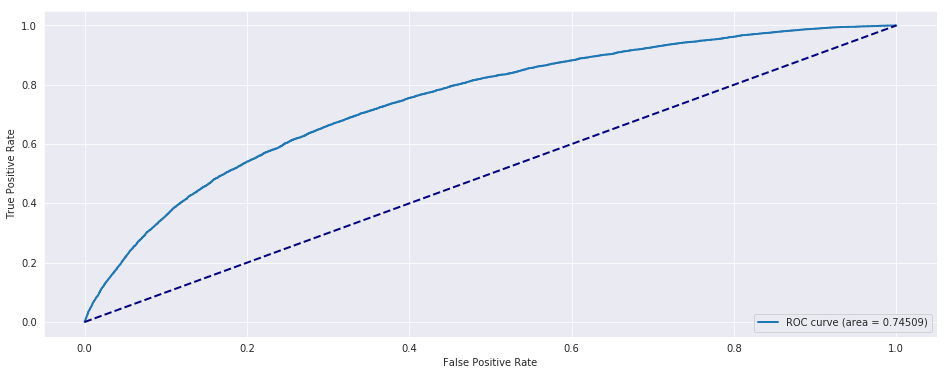

In [28]:
from sklearn.metrics import roc_curve, auc
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_test_final.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve( y_test_final.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
fpr, tpr, logreg_auc_score = compute_roc_auc(classifier,X_test_final.index)
scores_classifier.append(logreg_auc_score)
fprs_classifier.append(fpr)
tprs_classifier.append(tpr)
print("AUC : "+str(logreg_auc_score))
plt.figure(figsize=(16, 6))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)' % logreg_auc_score)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

**2. Random Forest Classifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_final, y_train_final)
predictions = classifier.predict_proba(X_test_final)[:,1]

In [30]:
y1 = pd.DataFrame(predictions,columns=['prob'])
y1['hard'] = np.where(y1['prob']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
rf_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("CM Accuracy : "+str(rf_real_auc))
rf_pred = pd.DataFrame(predictions,columns=['self_pay_status'])

CM Accuracy : 0.8918346092707972


AUC : 0.7505586211705404


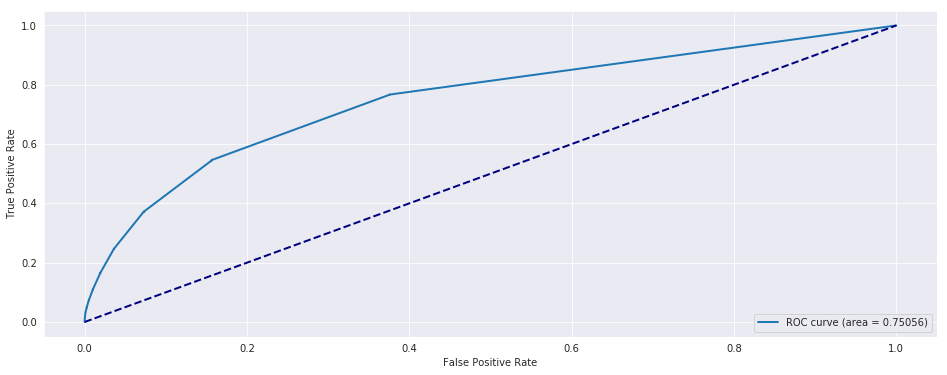

In [31]:
from sklearn.metrics import roc_curve, auc
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_test_final.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve( y_test_final.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
fpr, tpr, rf_auc_score = compute_roc_auc(classifier,X_test_final.index)
scores_classifier.append(rf_auc_score)
fprs_classifier.append(fpr)
tprs_classifier.append(tpr)
print("AUC : "+str(rf_auc_score))
plt.figure(figsize=(16, 6))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)' % rf_auc_score)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

**3. ANN (Artificial Neural Networks)**

In [32]:
import keras
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import confusion_matrix
    # Initialising the ANN
classifier = Sequential()
    # Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu', input_dim = 35))
    # Adding the second hidden layer
classifier.add(Dense(output_dim = 18, init= 'uniform', activation = 'relu'))
    # Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    # Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fitting the ANN to the Training set
classifier.fit(X_train_final, y_train_final, batch_size = 10, epochs = 1)
predictions = classifier.predict_proba(X_test_final)

Using TensorFlow backend.


Epoch 1/1
437846/437846 [==============================] - 69s 157us/step - loss: 0.2145 - accuracy: 0.9371


In [33]:
y1 = pd.DataFrame(predictions,columns=['prob'])
y1['hard'] = np.where(y1['prob']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
ann_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("CM Accuracy : "+str(ann_real_auc))
ann_pred = pd.DataFrame(predictions,columns=['self_pay_status'])

CM Accuracy : 0.9239096672817965


AUC : 0.7430969332688495


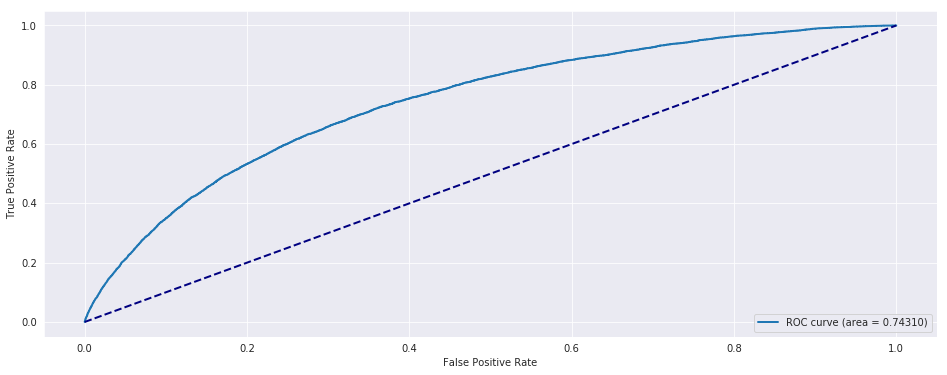

In [34]:
from sklearn.metrics import roc_curve, auc
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_test_final.iloc[index])
    fpr, tpr, thresholds = roc_curve( y_test_final.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
fpr, tpr, ann_auc_score = compute_roc_auc(classifier,X_test_final.index)
scores_classifier.append(ann_auc_score)
fprs_classifier.append(fpr)
tprs_classifier.append(tpr)
print("AUC : "+str(ann_auc_score))
plt.figure(figsize=(16, 6))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)' % ann_auc_score)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

**4. XG Boost Classifier**

In [35]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 0)
classifier.fit(X_train_final, y_train_final)
predictions = classifier.predict_proba(X_test_final)[:,1]

In [36]:
y1 = pd.DataFrame(predictions,columns=['prob'])
y1['hard'] = np.where(y1['prob']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
xgb_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("CM Accuracy : "+str(xgb_real_auc))
xgb_pred = pd.DataFrame(predictions,columns=['self_pay_status'])

CM Accuracy : 0.9120699420803566


AUC : 0.7703251893620582


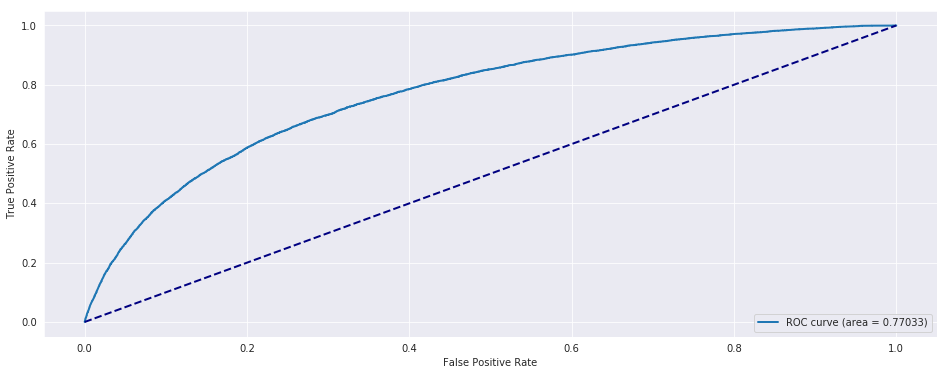

In [37]:
from sklearn.metrics import roc_curve, auc
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_test_final.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve( y_test_final.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
fpr, tpr, xgb_auc_score = compute_roc_auc(classifier,X_test_final.index)
scores_classifier.append(xgb_auc_score)
fprs_classifier.append(fpr)
tprs_classifier.append(tpr)
print("AUC : "+str(xgb_auc_score))
plt.figure(figsize=(16, 6))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)' % xgb_auc_score)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

**5. Light GBM Classifier**

In [38]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
classifier = LGBMClassifier(random_state = 0)
classifier.fit(X_train_final, y_train_final)
predictions = classifier.predict_proba(X_test_final)[:,1]

In [39]:
y1 = pd.DataFrame(predictions,columns=['prob'])
y1['hard'] = np.where(y1['prob']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
lgb_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("CM Accuracy : "+str(lgb_real_auc))
lgb_pred = pd.DataFrame(predictions,columns=['self_pay_status'])

CM Accuracy : 0.9075935027680839


AUC : 0.7873100264656983


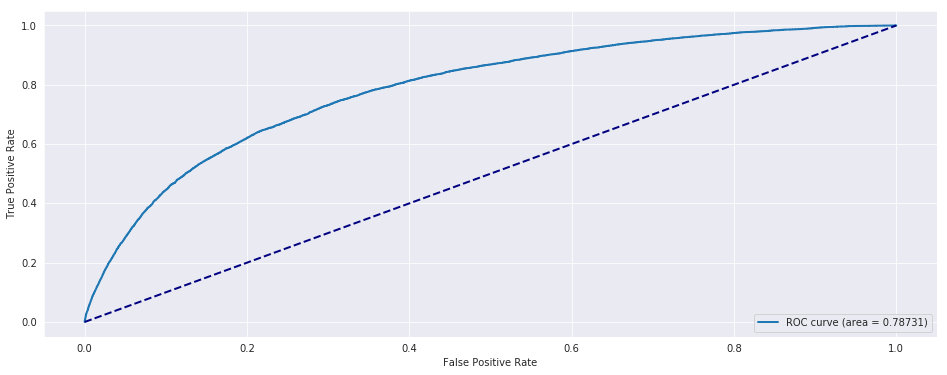

In [40]:
from sklearn.metrics import roc_curve, auc
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(X_test_final.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve( y_test_final.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score
fpr, tpr, lgb_auc_score = compute_roc_auc(classifier,X_test_final.index)
scores_classifier.append(lgb_auc_score)
fprs_classifier.append(fpr)
tprs_classifier.append(tpr)
print("AUC : "+str(lgb_auc_score))
plt.figure(figsize=(16, 6))
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)' % lgb_auc_score)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

**Blending the 5 model solutions** and computing weighted average accuracy

In [41]:
y1 = (logreg_real_auc*logreg_pred + rf_real_auc*rf_pred + ann_real_auc*ann_pred + xgb_real_auc*xgb_pred + lgb_real_auc*lgb_pred)/5
y1['hard'] = np.where(y1['self_pay_status']<0.2,0,1)
#print(y1.groupby(['hard'])['prob'].count())
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_final, y1['hard'])
#print(cm)
final_real_auc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("Final Blended CM Accuracy : "+str(final_real_auc))
final_pred_cm = y1

Final Blended CM Accuracy : 0.9245217518408215


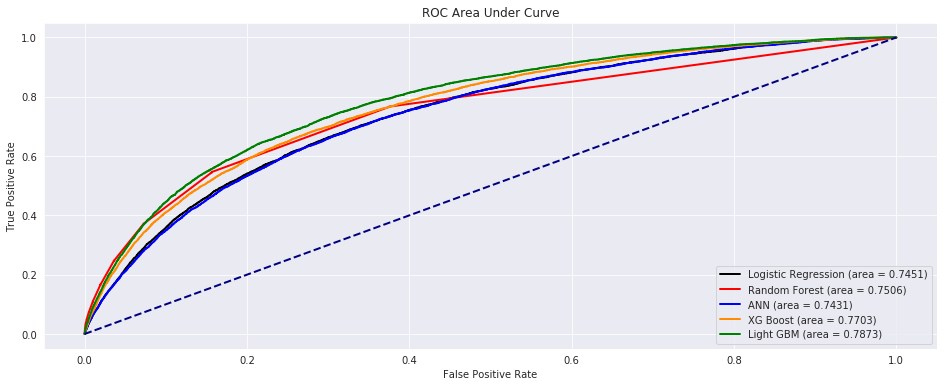

In [42]:
#print(np.mean(scores_classifier,axis = 0)[1])   
plt.figure(figsize=(16, 6))
lw = 2
model_list = ['Logistic Regression','Random Forest','ANN','XG Boost','Light GBM']
colors = ['black','red','blue','darkorange','green']
for i in range(0,5):
    plt.plot(fprs_classifier[i], tprs_classifier[i], color=colors[i],
             lw=lw, label="{} (area = {})".format(model_list[i],round(scores_classifier[i],4)))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.title('ROC Area Under Curve')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 

In [43]:
final_pred_cm.to_csv('cm_predictions_testset.csv',index=False)